In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
bean_df = pd.read_excel("Dry_Bean_Dataset.xlsx")
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [10]:
bean_df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<img src="images/beans_pics.jpg">

In [18]:
bean_df_count = bean_df.groupby("Class").agg(class_count=("Class", "count")).reset_index().sort_values(
    "class_count", ascending=False)
bean_df_count

,Class,class_count
3,DERMASON,3546
6,SIRA,2636
5,SEKER,2027
4,HOROZ,1928
2,CALI,1630
0,BARBUNYA,1322
1,BOMBAY,522


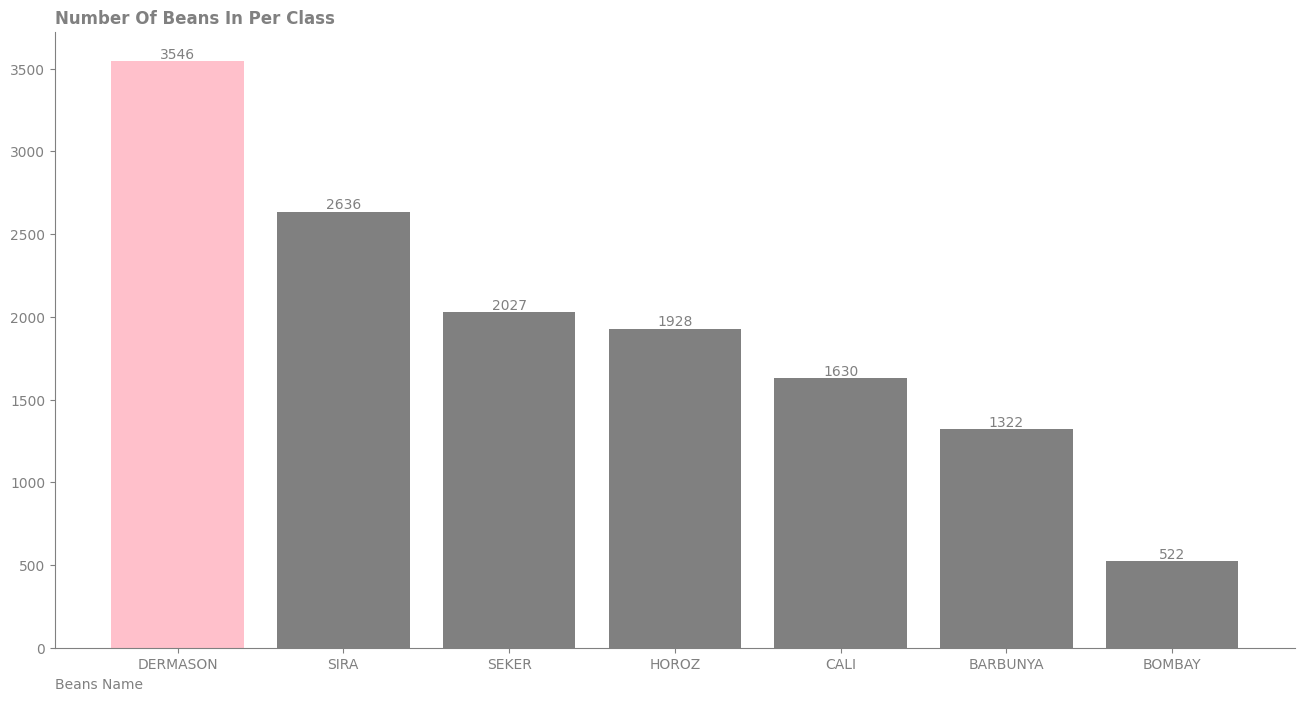

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
clrs = ["gray" if (x < max(bean_df_count["class_count"])) else "pink"
         for x in bean_df_count["class_count"]]

ax.bar(bean_df_count["Class"], 
        bean_df_count["class_count"], color=clrs)

ax.set_title("Number Of Beans In Per Class", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Beans Name", loc="left", color="gray")

for bars in ax.containers:
    ax.bar_label(bars, color="gray")
    
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()